Dummy would be a copy that works as a substitute. For instance, the categorical that transformed into numerical.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
sns.set_theme()

In [2]:
raw_data = pd.read_csv('files/1.03.+Dummies.csv')
raw_data.head()

,SAT,GPA,Attendance
0,1714,2.40,No
1,1664,2.52,No
2,1760,2.54,No
3,1685,2.74,No
4,1693,2.83,No


In [3]:
data = raw_data.copy()
data['Attendance'] = data['Attendance'].map({'Yes': 1, 'No': 0})
data

,SAT,GPA,Attendance
0,1714,2.40,0
1,1664,2.52,0
2,1760,2.54,0
3,1685,2.74,0
4,1693,2.83,0
...,...,...,...
79,1936,3.71,1
80,1810,3.71,1
81,1987,3.73,0
82,1962,3.76,1


In [4]:
y, x1 = data['GPA'], data[['SAT', 'Attendance']]
x = sm.add_constant(x1)
results = sm.OLS(y, x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     52.70
Date:                Fri, 20 Dec 2024   Prob (F-statistic):           2.19e-15
Time:                        18:53:33   Log-Likelihood:                 25.798
No. Observations:                  84   AIC:                            -45.60
Df Residuals:                      81   BIC:                            -38.30
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6439      0.358      1.797      0.076      -0.069       1.357
SAT            0.0014      0.000      7.141      0.000       0.001       0.002
Attendance     0.2226      0.041      5.451      0.000       0.141       0.304
==============================================================================
Omnibus:                       19.560   Durbin-Watson:                   1.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.189
Skew:                          -1.028   Prob(JB):                     1.25e-06
Kurtosis:                       4.881   Cond. No.                     3.35e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [5]:
data.describe()

,SAT,GPA,Attendance
count,84.000000,84.000000,84.000000
mean,1845.273810,3.330238,0.464286
std,104.530661,0.271617,0.501718
min,1634.000000,2.400000,0.000000
25%,1772.000000,3.190000,0.000000
50%,1846.000000,3.380000,0.000000
75%,1934.000000,3.502500,1.000000
max,2050.000000,3.810000,1.000000


In [6]:
GPA = 0.6439 + (0.0014 * data.SAT) + (0.2226 * data.Attendance)
GPA

0     3.0435
1     2.9735
2     3.1079
3     3.0029
4     3.0141
       ...  
79    3.5769
80    3.4005
81    3.4257
82    3.6133
83    3.7365
Length: 84, dtype: float64

In [8]:
GPA_no_attendance = 0.6439 + (0.0014 * data.SAT)
GPA_with_attendance = 0.6439 + (0.0014 * data.SAT) + 0.2226

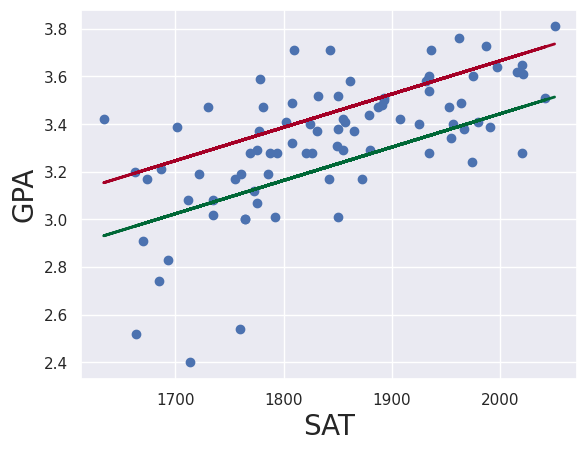

In [10]:
plt.scatter(data.SAT, y)
yhat_no_attendance = 0.6439 + 0.0014 * data.SAT
yhat_with_attendance = 0.8665 + 0.0014 * data.SAT
fig = plt.plot(data.SAT, yhat_no_attendance, lw=2, c='#006837')
fig = plt.plot(data.SAT, yhat_with_attendance, lw=2, c='#a50026')
plt.xlabel('SAT', fontsize=20)
plt.ylabel('GPA', fontsize=20)
plt.show()